## **Predict house prices**

In [1]:
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import plotly.express as px
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

In [2]:
# boston dataset comes with sklearn by default
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
data['MEDV'] = boston.target # Create missing target column

In [6]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [7]:
# profile = ProfileReport(data, title='Pandas Profile Report', html={'style':{'full_width':True}})

In [8]:
# profile.to_file(output_file='Profile report.html')

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

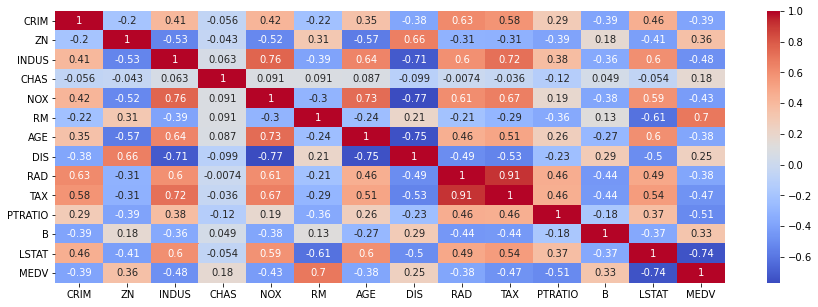

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.show()

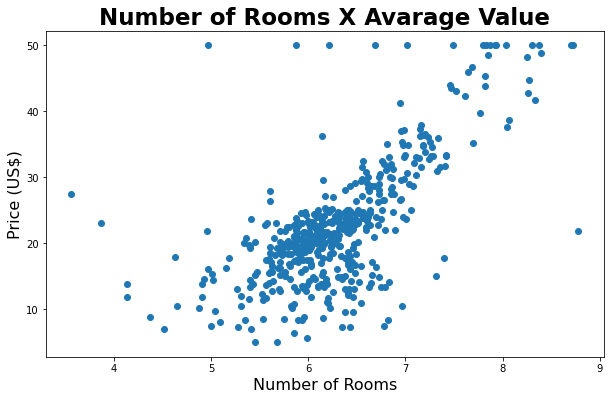

In [11]:
fig , ax = plt.subplots(figsize=(10, 6))

plt.scatter(x=data.RM, y=data.MEDV)
plt.title("Number of Rooms X Avarage Value", fontdict={'fontweight':'bold','fontsize':23})
plt.xlabel("Number of Rooms", fontsize=16)
plt.ylabel("Price (US$)", fontsize=16)

plt.show()

## Identifying Outliers

In [12]:
print(data.RM.describe())

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64


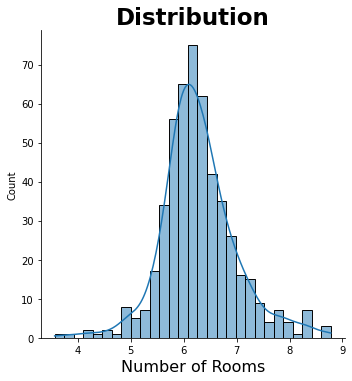

In [13]:
sns.displot(data, x="RM", kde=True)
plt.title("Distribution", fontdict={'fontweight':'bold','fontsize':23})
plt.xlabel("Number of Rooms", fontsize=16)

plt.show()

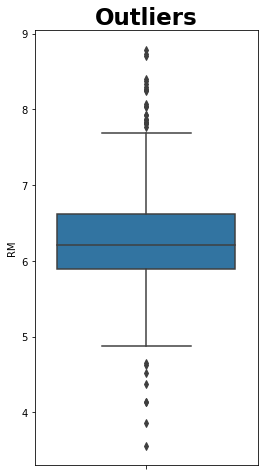

In [14]:
fig, ax = plt.subplots(figsize=(4,8))

sns.boxplot(y=data.RM)
plt.title("Outliers", fontdict={'fontweight':'bold','fontsize':23})

plt.show()

In [15]:
from scipy import stats
stats.skew(data.MEDV)

1.104810822864635

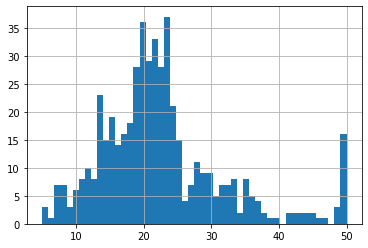

In [16]:
data.MEDV.hist(bins=50);

In [17]:
data[['RM','LSTAT','PTRATIO','MEDV']].nlargest(16, 'MEDV')

,RM,LSTAT,PTRATIO,MEDV
161,7.489,1.73,14.7,50.0
162,7.802,1.92,14.7,50.0
163,8.375,3.32,14.7,50.0
166,7.929,3.70,14.7,50.0
186,7.831,4.45,17.8,50.0
195,7.875,2.97,14.4,50.0
204,8.034,2.88,14.7,50.0
225,8.725,4.63,17.4,50.0
257,8.704,5.12,13.0,50.0
267,8.297,7.44,13.0,50.0


In [18]:
# Take the index of the 16 largest MEDV
top16 = data.nlargest(16, 'MEDV').index
top16

Int64Index([161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
            370, 371, 372],
           dtype='int64')

In [19]:
# Drop...
data.drop(top16, inplace=True)

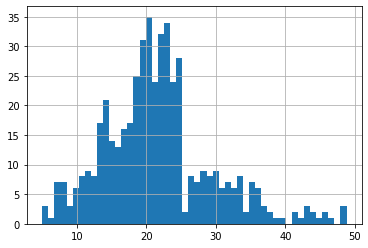

In [20]:
data.MEDV.hist(bins=50);

In [21]:
stats.skew(data.MEDV)

0.7732836030909053

## Calculate Baseline

In [22]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [23]:
data['RM'] = data['RM'].astype('int32')

In [24]:
data.RM.dtypes

dtype('int32')

In [25]:
# Defining rules to categorise data
category = []

for i in data.RM.iteritems():
    number = (i[1])
    if number <= 4:
        category.append('Small')
    elif number < 7:
        category.append('Medium')
    else:
        category.append('Big')

In [26]:
data["CATEGORY"] = category # Create CATEGORY row

In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CATEGORY
0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Medium
1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Medium
2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Big
3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Medium
4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Big


In [28]:
data.CATEGORY.value_counts()

Medium    424
Big        52
Small      14
Name: CATEGORY, dtype: int64

In [29]:
medium_category = data.groupby(by='CATEGORY')['MEDV'].mean()

In [30]:
medium_category

CATEGORY
Big       35.719231
Medium    20.130425
Small     14.921429
Name: MEDV, dtype: float64

In [31]:
dic_baseline = {'Big':medium_category[0], 'Medium':medium_category[1], 'Small':medium_category[2]}

In [32]:
dic_baseline

{'Big': 35.71923076923077,
 'Medium': 20.1304245283019,
 'Small': 14.921428571428574}

In [33]:
def return_baseline(num_rooms):
    if num_rooms <= 4:
        return dic_baseline['Small']
    elif num_rooms <7:
        return dic_baseline['Medium']
    else:
        return dic_baseline['Big']

In [34]:
return_baseline(5)

20.1304245283019

In [35]:
# Takes the medium value of each house by their number of rooms.
for i in data.RM.iteritems():
    n_rooms = i[1]
#     print(f"The numbers of rooms is: {n_rooms} and the medium price is: {return_baseline(n_rooms)}")

## Model validation - Root Mean Square Error : RMSE 
Erro médio quadrático

In [36]:
# y = test data 
y = data['MEDV']

In [37]:
# x = training data
# Deleting columns with strong correlation. "and delete y column"
x = data.drop(['RAD','TAX','MEDV','DIS','AGE','ZN','CATEGORY'], axis=1)

In [38]:
x.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33


In [39]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Splitting data for training and test
#### 80% training
#### 20% test

In [40]:
# Load train_test_split method
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [42]:
# taking a look to the data distribution for training and test.
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (392, 8)
x_test: (98, 8)
y_train: (392,)
y_test: (98,)


In [43]:
x_test.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
245,0.19133,5.86,0.0,0.431,5,19.1,389.13,18.46
456,4.66883,18.10,0.0,0.713,5,20.2,10.48,19.01
75,0.09512,12.83,0.0,0.437,6,18.7,383.23,8.94
238,0.08244,4.93,0.0,0.428,6,16.6,379.41,6.36
362,3.67822,18.10,0.0,0.770,5,20.2,380.79,10.19


In [44]:
prediction = []
# Load the average price for each house
for i in x_test.RM.iteritems():
    num_rooms = i[1]
    prediction.append(return_baseline(num_rooms)) # return_baseline functoin was defined before

In [45]:
prediction[:5]

[20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019]

In [46]:
# Create DataFrame with real values and values with baseline prediction
df_results = pd.DataFrame()

df_results['Value_Real'] = y_test.values
df_results['Value_Predicton_Baseline'] = prediction

In [47]:
df_results.head()

,Value_Real,Value_Predicton_Baseline
0,18.5,20.130425
1,12.7,20.130425
2,21.4,20.130425
3,23.7,20.130425
4,20.8,20.130425


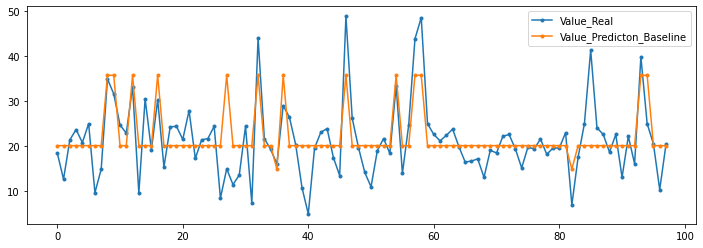

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(df_results, '.-')
plt.legend(['Value_Real','Value_Predicton_Baseline']);

## Running RMSE - Root Mean Square Error

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
#Calculate RMSE margin of error.
rmse = (np.sqrt(mean_squared_error(y_test, prediction)))

In [51]:
# Printing out the model performance
print(f'RMSE margin of error is up to: {rmse}')

RMSE margin of error is up to: 6.205816494411828


## Machine Learning

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# Create linear regression object
lin_model = LinearRegression()

In [54]:
# Train the linear regression algorithm
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Evaluate the model on test data
y_pred = lin_model.predict(x_test)

In [56]:
# Calculate the RMSE metric
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [57]:
# Printing performace of the model on the test data
print(f'Performace: {rmse}')

Performace: 4.460277295153906


Linear Regression, in this case, was more efficient than the Baseline model

In [58]:
# Create column on the dataframe with linear regression results
df_results['Linear_regression_prediction'] = lin_model.predict(x_test)

In [59]:
df_results.head()

,Value_Real,Value_Predicton_Baseline,Linear_regression_prediction
0,18.5,20.130425,18.459170
1,12.7,20.130425,12.279894
2,21.4,20.130425,24.588307
3,23.7,20.130425,28.254693
4,20.8,20.130425,18.195439


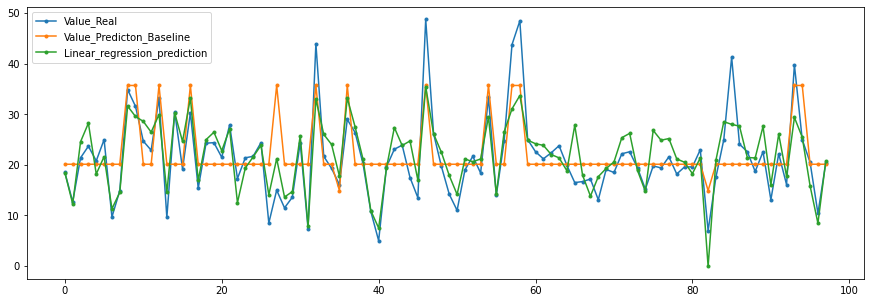

In [60]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(df_results, '.-')
plt.legend(['Value_Real','Value_Predicton_Baseline','Linear_regression_prediction']);

### Decision Tree
Another surpervisionated algorithm

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
regressor = DecisionTreeRegressor()

In [63]:
# Train the algorithm
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Evaluate the Decision Tree Model

In [64]:
# Prevision
y_pred = regressor.predict(x_test)

In [65]:
# Add model results to df
df_results['Prediction_tree'] = y_pred

In [66]:
df_results.head()

,Value_Real,Value_Predicton_Baseline,Linear_regression_prediction,Prediction_tree
0,18.5,20.130425,18.459170,17.8
1,12.7,20.130425,12.279894,23.2
2,21.4,20.130425,24.588307,24.5
3,23.7,20.130425,28.254693,24.3
4,20.8,20.130425,18.195439,21.8


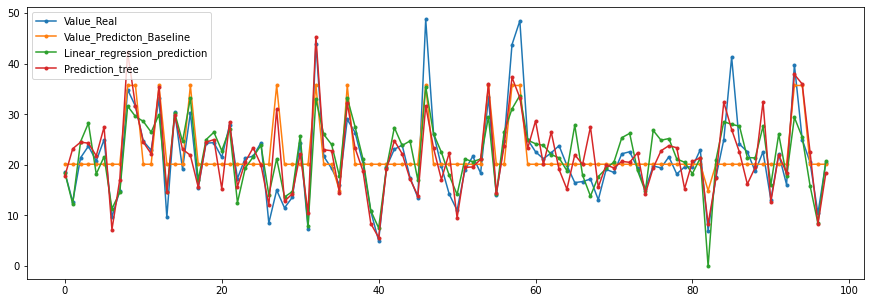

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(df_results, '.-')
plt.legend(['Value_Real','Value_Predicton_Baseline','Linear_regression_prediction','Prediction_tree']);

In [68]:
# Calculate the rmse metric
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [69]:
# Performance
print(f'RMSE é: {rmse}') # Linear regression was better than this decision tree: Performace: 4.460277295153906

RMSE é: 4.813501419794882


## Random Forest
### Additional parameters:
`n_estimators: Define the number of trees`
`max_deph: Trees depth`
`max_features: Number of nodes`

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Create rf_regressor object
rf_regressor = RandomForestRegressor()

In [72]:
# Train the algorithm
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
# Evaluate model on test data
y_pred = rf_regressor.predict(x_test)

In [74]:
# Add results to the log datafrade
df_results['Random_forest'] = rf_regressor.predict(x_test)

In [75]:
# Calculate rmse metric
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [76]:
# Print model performance
print(f'RMSE: {rmse}')

RMSE: 3.2580631688542954


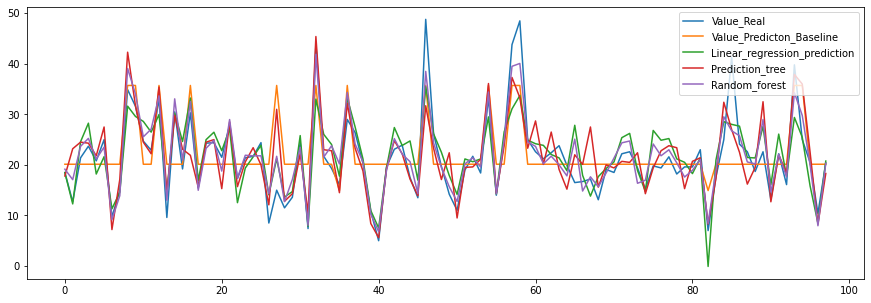

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(df_results, '-')
plt.legend(['Value_Real','Value_Predicton_Baseline','Linear_regression_prediction','Prediction_tree','Random_forest']);

## Export data to data APP

In [78]:
# x is the training data and y is the test data created berore.
x['MEDV'] = y

In [79]:
x.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33,36.2


In [80]:
x.to_csv('data.csv')